In [1]:
from utils import plot, plot_with_velocities, plot_trajectory, plot_with_v_color
from build_ensemble import hex_build, square_build
from evolve import update_position, update_velocity, equilibriate, force, calculate_energies
import matplotlib.pyplot as plt
import numpy as np
from evolve import find_directions
starting_conf = square_build()
starting_conf.forces = force(starting_conf.positions)
conf, energies, configs = equilibriate(starting_conf, nsteps=5000, cache_interval=10)

|#-----------------------------------------------------------------------------------|1.3%%

e:\langevin\src\soft-disks\evolve.py:55: RuntimeWarning: invalid value encountered in divide
  np.divide(


|####################################################################################|99.98%

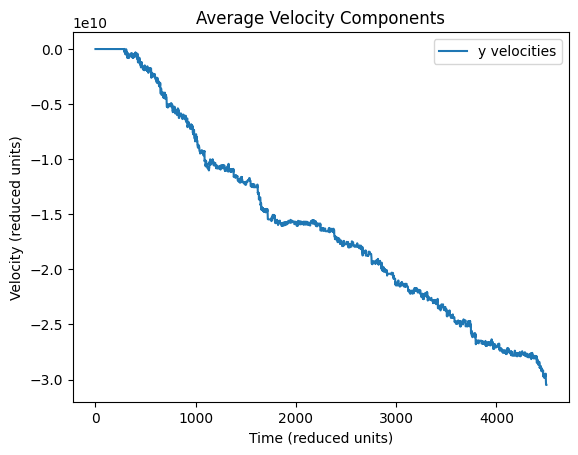

In [2]:
# plt.plot(np.array([conf.velocities[:, 0] for conf in configs]).mean(-1), label='x velocities')
plt.plot(np.array([conf.velocities[:, 1] for conf in configs]).mean(-1), label='y velocities')
plt.ylabel("Velocity (reduced units)")
plt.xlabel("Time (reduced units)")

plt.title("Average Velocity Components")
plt.legend()
# np.array([conf.velocities[:, 1] for conf in confs]).mean(0)
# np.array([conf.velocities[:, 0] for conf in confs]).mean(-1).size

In [3]:
import numpy as np
from evolve import v_rebox
print(v_rebox(np.array([[17,12], [500,500], [-100,50]])))

[[5. 0.]
 [2. 2.]
 [2. 2.]]


In [5]:


# plt.hist(conf.velocities[:,0], label='new x velocities')

# plt.hist(conf.velocities[:,1], label='new y velocities')
# plt.hist(starting_conf.velocities[:,0], label='x velocities')
# plt.hist(starting_conf.velocities[:,1], label='y velocities')
# plt.legend()

e:\langevin\src\soft-disks\utils.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_18404\3241148188.py:4: RuntimeWarning: invalid value encountered in divide
  plt.arrow(*position, *(force/np.linalg.norm(force)))


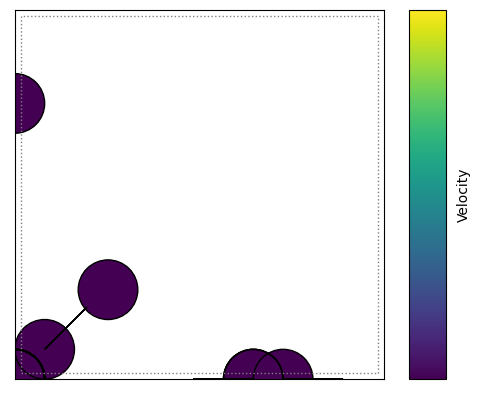

In [4]:
def plot_forces_on_particles(conf):
    plot_with_v_color(conf)
    for position,force in zip(conf.positions, conf.forces):
        plt.arrow(*position, *(force/np.linalg.norm(force)))

plot_forces_on_particles(conf)

In [ ]:
# plt.plot(energies[1][100:-1], label="Potential Energy")
energies[1].min()
# plt.plot(energies[0], label="Kinetic Energy")
# plt.plot(energies[0]+energies[1], label="Total Energy")

# plt.legend()

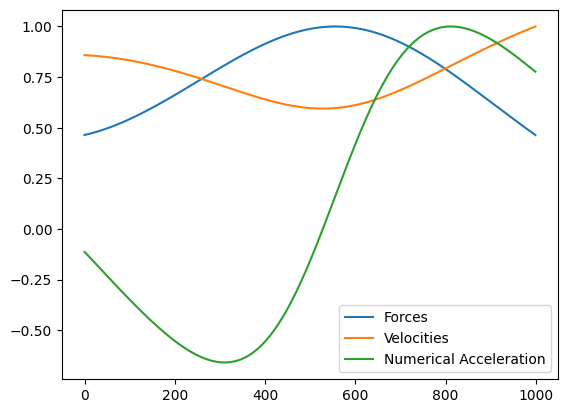

In [4]:
i = 12
forces = np.array([np.linalg.norm(conf.forces[i,:]) for conf in confs])
normalised_forces = forces / forces.max()

velocities = np.array([np.linalg.norm(conf.velocities[i,:]) for conf in confs])
normalised_velocities = velocities/velocities.max()

velocity_gradient = np.gradient(normalised_velocities)
normalised_velocity_gradient = velocity_gradient/velocity_gradient.max()
plt.plot(normalised_forces, label='Forces')
plt.plot(normalised_velocities, label='Velocities')
plt.plot(normalised_velocity_gradient, label='Numerical Acceleration')

plt.legend()

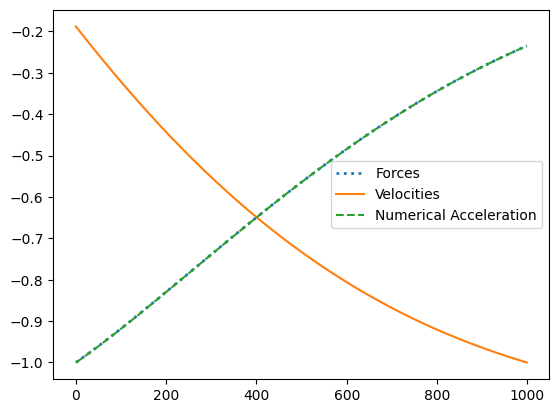

In [5]:
# Compare velocity, forces and the numerical derivative of the velocity 

i = 3
axis = 0
forces = np.array([conf.forces[i,axis] for conf in confs])
normalised_forces = forces / abs(forces).max()

velocities = np.array([conf.velocities[i,axis] for conf in confs])
normalised_velocities = velocities/abs(velocities).max()

velocity_gradient = np.gradient(normalised_velocities)
normalised_velocity_gradient = velocity_gradient/abs(velocity_gradient).max()

plt.plot(normalised_forces, label='Forces', linestyle=':', linewidth=2)
plt.plot(normalised_velocities, label='Velocities')
plt.plot(normalised_velocity_gradient, label='Numerical Acceleration', linestyle='--')

plt.legend()

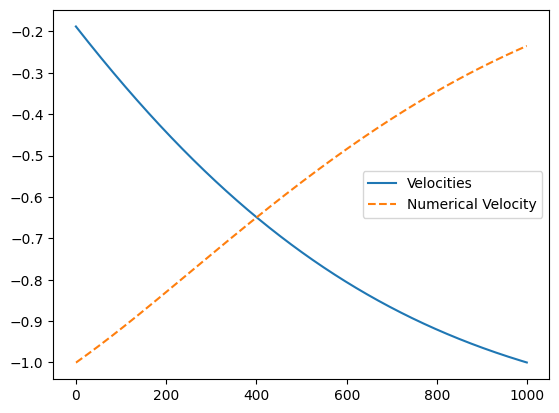

In [6]:
i = 20
axis = 1

positions = np.array([conf.positions[i, axis] for conf in confs])

velocities = np.array([conf.velocities[i, axis] for conf in confs])
velocities = velocities/abs(velocities).max()
position_gradient = np.gradient(normalised_velocities)
normalised_position_gradient = position_gradient/abs(position_gradient).max()

plt.plot(normalised_velocities, label='Velocities')
plt.plot(normalised_position_gradient, label='Numerical Velocity', linestyle='--')

plt.legend()

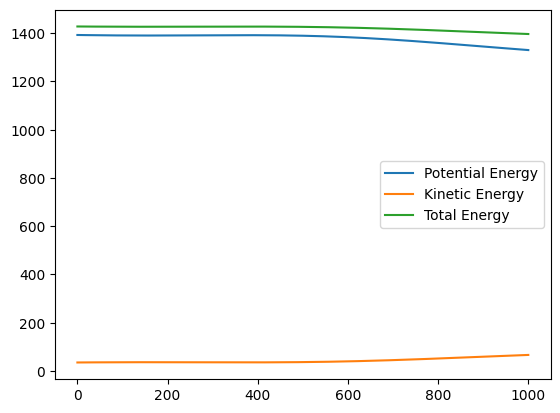

In [6]:
plt.plot(range(energies[1].size), energies[1], label="Potential Energy")
plt.plot(range(energies[0].size), energies[0], label="Kinetic Energy")
plt.plot(range(energies[0].size), energies[0]+energies[1], label="Total Energy")

plt.legend()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from data_types import Configuration
from build_ensemble import square_build
from evolve import force, find_directions, calculate_energies, update_velocity, update_position
from config import epsilon

posarr = np.array([[0.1, 5.75], [0.1 + 2*epsilon,5.75]])
conf = Configuration(
    posarr,
    np.array([[0.1, 0.1], [-0.1, 0.1]]),
    force(posarr)
)

print(f"Directions: {find_directions(conf.positions[0], conf.positions[1])}")
print(f"Force on particle 1: {conf.forces[0]}")
print(f"Magnitude of change in position: {np.linalg.norm((new_pos:=update_position(conf))[0])-conf.positions[0]}")
new_vel = update_velocity(conf, new_pos)[0]

print(f"Delta v on particle 1: {conf.velocities[0]-new_vel[0]}")
pre_energy = calculate_energies(conf)
# post_energy = calculate_energies(Configuration(new_pos, new_vel, []))
print(f"Initial potential energy: {pre_energy[1]}")
# print(f"Kinetic energy change: {post_energy[0] - pre_energy[0]}")


Directions: (array([], dtype=float64), array([], dtype=float64))
Force on particle 1: [0 0]
Magnitude of change in position: [5.65087459e+00 8.74585665e-04]
Delta v on particle 1: [0. 0.]
Initial potential energy: 0.9384765625


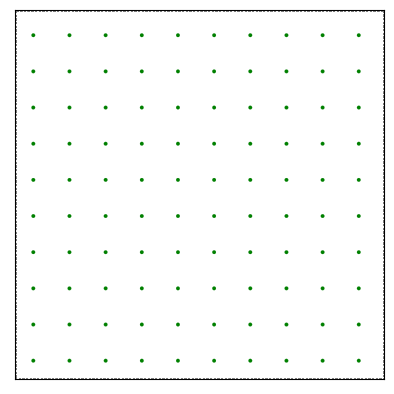

In [70]:
import numpy as np
a = np.array([[[1,2],[1,2]],[[2,3],[2,3]],[[4,5],[4,5]]])
def tile_and_remove_self_reference(position_array, ndims: int=2):
    """
    Tile the input array of positions such that each particle has an associated copy of the position array. Then remove the diagonal elements of resulting matrix to remove the position of the particle to which the new position array belongs
    """
    tiled = np.tile(position_array, (position_array.shape[0],1,1))
    return tiled[~np.eye(tiled.shape[0],tiled.shape[1], dtype=bool)].reshape([tiled.shape[0], -1, ndims])


In [73]:
from build_ensemble import square_build
starting_conf = square_build()
position_subset = starting_conf.positions[0:4,:]
print(position_subset)
print(remove_diagonal_elems(starting_conf.positions))



[[0.5  0.5 ]
 [0.5  1.95]
 [0.5  3.4 ]
 [0.5  4.85]]
[[[0.5  1.95]
  [0.5  3.4 ]
  [0.5  4.85]
  [1.95 0.5 ]
  [1.95 1.95]
  [1.95 3.4 ]
  [1.95 4.85]
  [3.4  0.5 ]
  [3.4  1.95]
  [3.4  3.4 ]
  [3.4  4.85]
  [4.85 0.5 ]
  [4.85 1.95]
  [4.85 3.4 ]
  [4.85 4.85]]

 [[0.5  0.5 ]
  [0.5  3.4 ]
  [0.5  4.85]
  [1.95 0.5 ]
  [1.95 1.95]
  [1.95 3.4 ]
  [1.95 4.85]
  [3.4  0.5 ]
  [3.4  1.95]
  [3.4  3.4 ]
  [3.4  4.85]
  [4.85 0.5 ]
  [4.85 1.95]
  [4.85 3.4 ]
  [4.85 4.85]]

 [[0.5  0.5 ]
  [0.5  1.95]
  [0.5  4.85]
  [1.95 0.5 ]
  [1.95 1.95]
  [1.95 3.4 ]
  [1.95 4.85]
  [3.4  0.5 ]
  [3.4  1.95]
  [3.4  3.4 ]
  [3.4  4.85]
  [4.85 0.5 ]
  [4.85 1.95]
  [4.85 3.4 ]
  [4.85 4.85]]

 [[0.5  0.5 ]
  [0.5  1.95]
  [0.5  3.4 ]
  [1.95 0.5 ]
  [1.95 1.95]
  [1.95 3.4 ]
  [1.95 4.85]
  [3.4  0.5 ]
  [3.4  1.95]
  [3.4  3.4 ]
  [3.4  4.85]
  [4.85 0.5 ]
  [4.85 1.95]
  [4.85 3.4 ]
  [4.85 4.85]]

 [[0.5  0.5 ]
  [0.5  1.95]
  [0.5  3.4 ]
  [0.5  4.85]
  [1.95 1.95]
  [1.95 3.4 ]
  [1.95 4.85]
 

In [6]:
from config import L
import numpy as np
a = square_build()
for position in a[0]:
    if position[0] < L/2:
        if position[1] < L/2:
            print("Quadrant 1!")

Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!
Quadrant 1!


In [7]:
centre_conf = square_build()
br_frame = (centre_conf[0] + np.array([L, -L]), centre_conf[1])

In [9]:
from numpy import linalg as LA

In [21]:
LA.norm(br_frame[0], axis=1)

array([14.15911665, 14.90002567, 15.6672679 , 16.45716073, 17.26659586,
       18.09295066, 18.93400993, 19.78789878, 20.65302597, 21.52803667,
       13.52017303, 14.29423868, 15.09230856, 15.91077099, 16.74663629,
       17.59742475, 18.46107327, 19.33585872, 20.22033571, 21.11328628,
       12.92408259, 13.73179127, 14.56072147, 15.40744838, 16.26919356,
       17.14369242, 18.02908923, 18.92385438, 19.82671955, 20.73662676,
       12.37703843, 13.21821701, 14.0774209 , 14.9515429 , 15.83811316,
       16.7351534 , 17.64106652, 18.55455292, 19.47454692, 20.40016811,
       11.88581455, 12.7594188 , 13.64753774, 14.54751327, 15.45727452,
       16.37519058, 17.29996344, 18.23054967, 19.16610249, 20.10592863,
       11.45759277, 12.36149719, 13.27626194, 14.19978827, 15.13047191,
       16.06706916, 17.00860311, 17.95429714, 18.90352691, 19.85578532,
       11.09966731, 12.03049438, 12.96862804, 13.91259031, 14.86127056,
       15.8138197 , 16.76957847, 17.72802776, 18.68875362, 19.65

In [20]:
a = np.array([1, 2, 3])
b = np.array([4,5,6])
print(a + b)
print(np.concatenate([a, b]))

[5 7 9]
[1 2 3 4 5 6]


In [50]:
from config import N
a = np.full((N, 4*N), np.nan)

# for elem in a:
a[~np.isnan(a)]
# print(type(np.nan))

array([], dtype=float64)

In [47]:
centre = square_build()
centre_positions = centre[0]
ewald_images = {
    "TL" : centre_positions + np.array([-L, L]),
    "CL" : centre_positions + np.array([-L, 0]),
    "BL" : centre_positions + np.array([-L, -L]),
    "BC" : centre_positions + np.array([0, -L]),
    "BR" : centre_positions + np.array([L, -L]),
    "CR" : centre_positions + np.array([L, 0]),
    "TR" : centre_positions + np.array([L, L]),
    "TC" : centre_positions + np.array([0, L]),
}
ewald_image = np.concatenate([centre_positions, *ewald_images.values()])



In [82]:
a = np.full((N, 9*N), np.nan)
for i in range(N):
    assert ewald_image[i, 0] > 0 and ewald_image[i, 0] < L # Check that atom is indeed in centre square
    assert ewald_image[i, 1] > 0 and ewald_image[i, 1] < L
    position = ewald_image[i]
    distances = LA.norm(ewald_image-position, axis=1)
    a[i,:] =  np.where(distances<L/2, distances, np.nan)
    directions = LA.unit


In [132]:

v = np.array([[1,2], [2,3], [4,5]], dtype=float)
v = np.divide(v, np.linalg.norm(v, axis=0)).transpose().reshape(3, 2)
# np.linalg.norm(v, axis=0)
v

array([[0.21821789, 0.43643578],
       [0.87287156, 0.32444284],
       [0.48666426, 0.81110711]])

In [181]:
# x_ = np.linalg.norm(x, axis=1).reshape([3, 1])
# x_ = np.concatenate(x_)


In [231]:
from numpy import newaxis
x = np.array([[1,2], [2,3], [4,5]], dtype=float)
y = np.array([1,2])
x-y
# x_ = np.linalg.norm(x, axis=1)
# x_ = np.concatenate([x_, x_]).reshape([3,-1], order='F')


array([[0., 0.],
       [1., 1.],
       [3., 3.]])

In [228]:
print(x)
print(x_)
x/x_

[[1. 2.]
 [2. 3.]
 [4. 5.]]
[[2.23606798 2.23606798]
 [3.60555128 3.60555128]
 [6.40312424 6.40312424]]


array([[0.4472136 , 0.89442719],
       [0.5547002 , 0.83205029],
       [0.62469505, 0.78086881]])

In [225]:
x_ = np.linalg.norm(x, axis=1)#.reshape([3,-1])
x_ = np.concatenate([x_, x_]).reshape([3,-1], order='F')
x_

array([[2.23606798, 2.23606798],
       [3.60555128, 3.60555128],
       [6.40312424, 6.40312424]])

In [230]:
len(square_build()[0])

100

In [1]:
import numpy as np

In [7]:
a = np.random.uniform(size=(100,2))

In [17]:
# a.shape
np.sum(np.linalg.norm(a, axis=1)**2)

69.59742908631645

In [23]:
from config import L, N
X,Y = np.mgrid[0.1:L-0.1:(L-0.2)/np.sqrt(N), 0.1:L-0.1:(L-0.2)/np.sqrt(N)]
initial_positions = np.array(list(zip(X.flatten(), Y.flatten())))

# initial_positions = 


array([[0.1       , 0.1       ],
       [0.1       , 1.73333333],
       [0.1       , 3.36666667],
       [0.1       , 5.        ],
       [0.1       , 6.63333333],
       [0.1       , 8.26666667],
       [1.73333333, 0.1       ],
       [1.73333333, 1.73333333],
       [1.73333333, 3.36666667],
       [1.73333333, 5.        ],
       [1.73333333, 6.63333333],
       [1.73333333, 8.26666667],
       [3.36666667, 0.1       ],
       [3.36666667, 1.73333333],
       [3.36666667, 3.36666667],
       [3.36666667, 5.        ],
       [3.36666667, 6.63333333],
       [3.36666667, 8.26666667],
       [5.        , 0.1       ],
       [5.        , 1.73333333],
       [5.        , 3.36666667],
       [5.        , 5.        ],
       [5.        , 6.63333333],
       [5.        , 8.26666667],
       [6.63333333, 0.1       ],
       [6.63333333, 1.73333333],
       [6.63333333, 3.36666667],
       [6.63333333, 5.        ],
       [6.63333333, 6.63333333],
       [6.63333333, 8.26666667],
       [8.

In [17]:
initial_positions

array([[[0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       ],
        [0.1       , 1.73333333, 3.36666667, 5.        , 6.63333333,
         8.26666667]],

       [[1.73333333, 1.73333333, 1.73333333, 1.73333333, 1.73333333,
         1.73333333],
        [0.1       , 1.73333333, 3.36666667, 5.        , 6.63333333,
         8.26666667]],

       [[3.36666667, 3.36666667, 3.36666667, 3.36666667, 3.36666667,
         3.36666667],
        [0.1       , 1.73333333, 3.36666667, 5.        , 6.63333333,
         8.26666667]],

       [[5.        , 5.        , 5.        , 5.        , 5.        ,
         5.        ],
        [0.1       , 1.73333333, 3.36666667, 5.        , 6.63333333,
         8.26666667]],

       [[6.63333333, 6.63333333, 6.63333333, 6.63333333, 6.63333333,
         6.63333333],
        [0.1       , 1.73333333, 3.36666667, 5.        , 6.63333333,
         8.26666667]],

       [[8.26666667, 8.26666667, 8.26666667, 8.26666667, 8.26666667,
         8.